## 앙상블 학습(Ensemble Learning)

여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

< 앙상블 유형 > 
* 보팅(Voting)
* 배깅(Bagging) - RandomForest
* 부스팅(Boosting) - AdaBoost, GBM, XGBoost, LightGBM .. 
* 스태킹(Stacking)

< 앙상블 특징 >
- 단일 모델의 약점을 다수의 모델들을 결합하여 보완
- 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음
- 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정 트리 알고리즘을 기반 알고리즘으로 적용
- 결정 트리의 단점인 과적합(오버 피팅)을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화

## 보팅(Voting)과 배깅(Bagging)

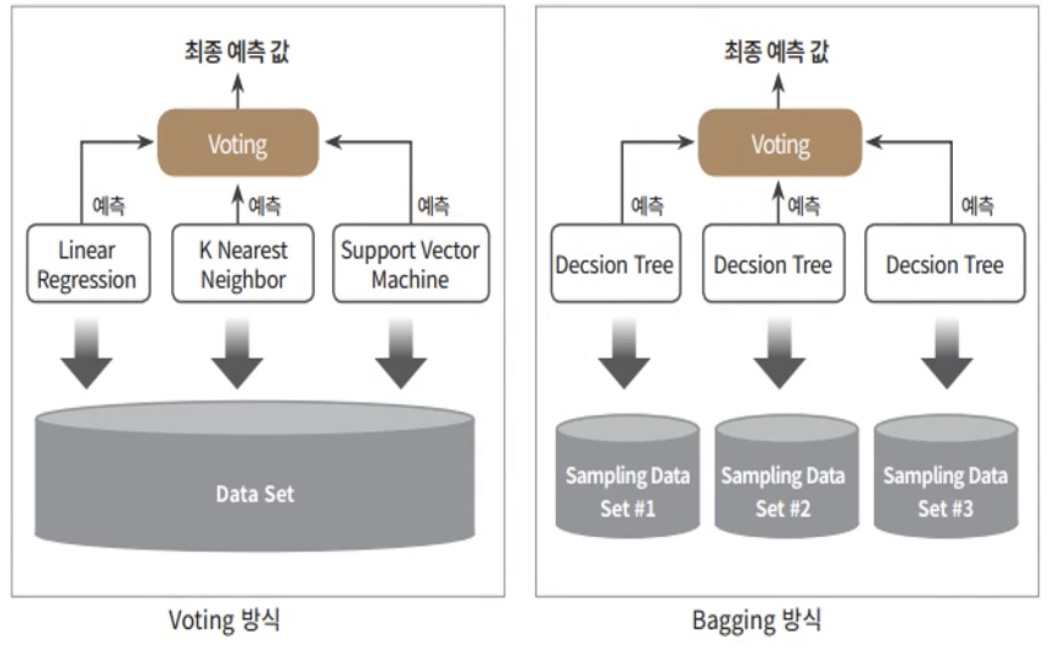

* 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식 
  - 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것 
  - 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행한 후 보팅을 수행하는 것

# Voting 
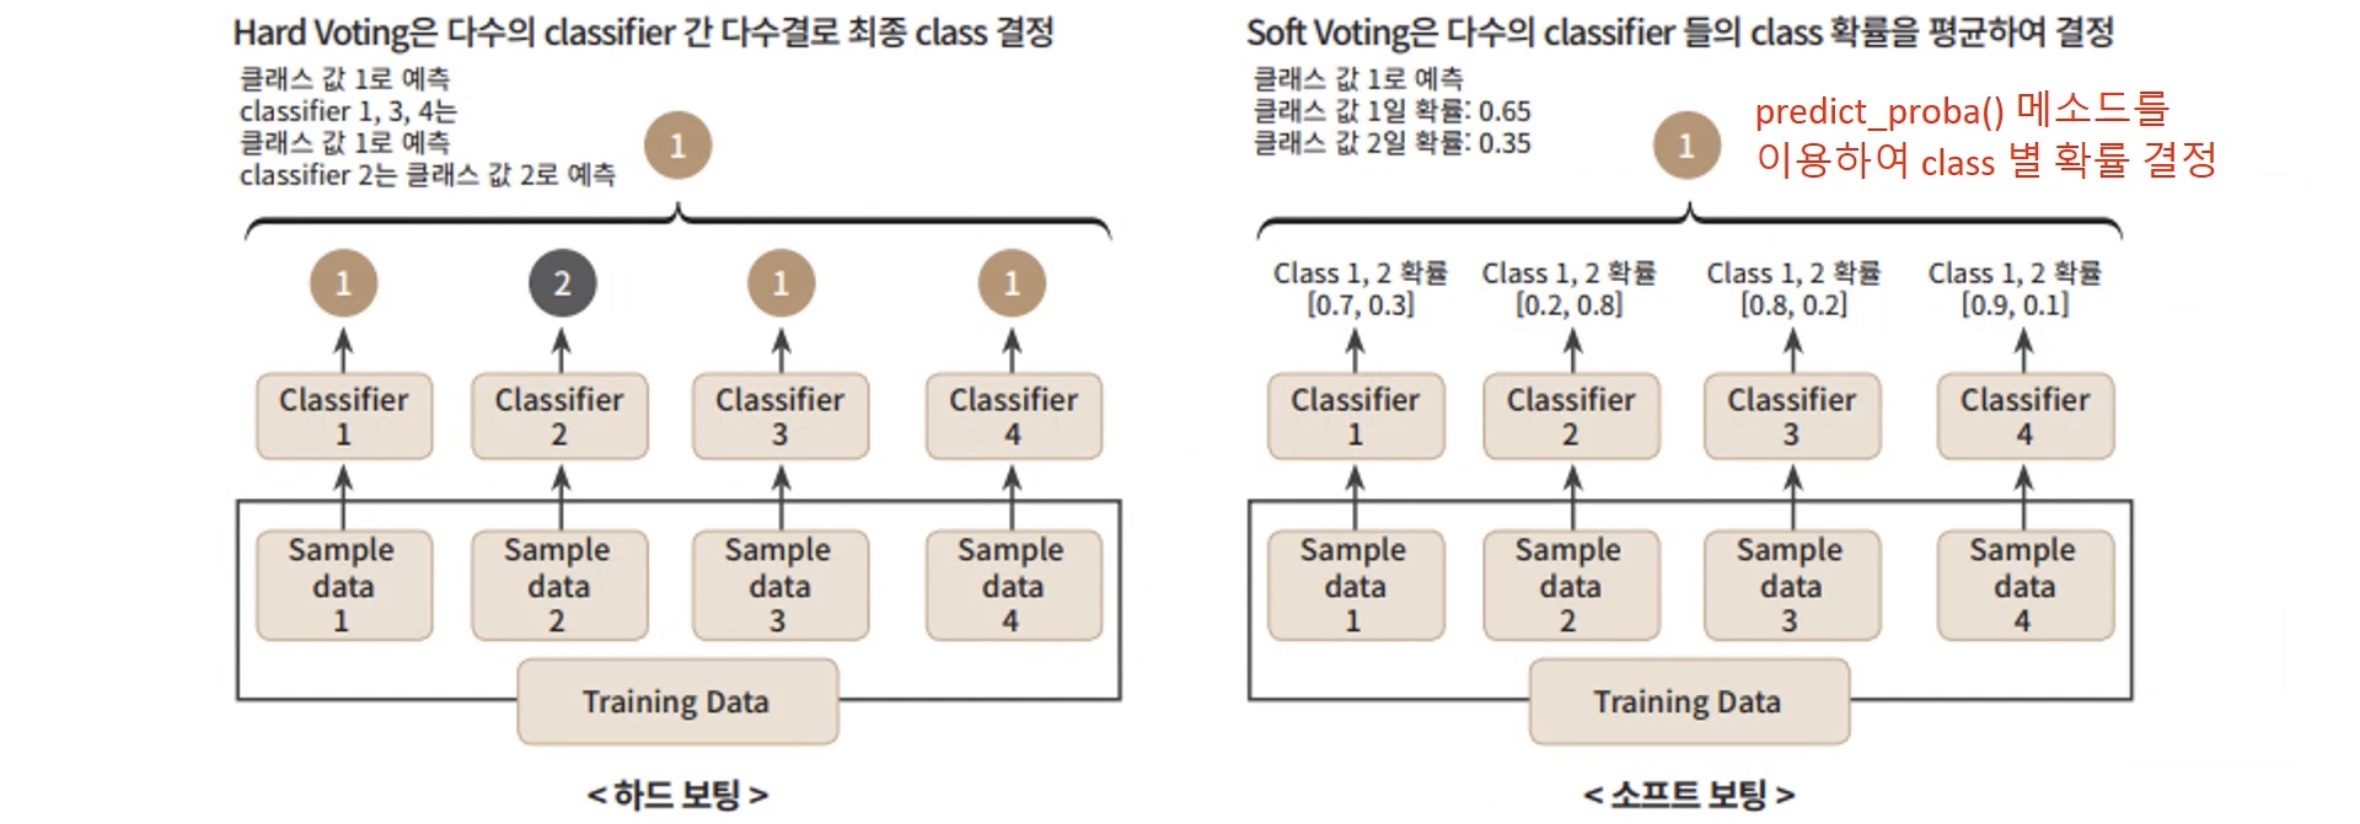

* 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됨
* 사이킷런은 VotingClassifier 클래스를 통해 보팅을 지원

#### 위스콘신 유방암 데이터 로드 

In [2]:
import pandas as pd 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교

In [4]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf_1 = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft') # 소프트 보팅
vo_clf_2 = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='hard') # 하드 보팅

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size =0.2, random_state=156)


# VotingClassifier 학습/예측/평가
vo_clf_1.fit(X_train,y_train)
pred1 = vo_clf_1.predict(X_test)
print('Voting 분류기 정확도(soft): {0:.4f}'.format(accuracy_score(y_test, pred1)))

# VotingClassifier 학습/예측/평가
vo_clf_2.fit(X_train,y_train)
pred2 = vo_clf_2.predict(X_test)
print('Voting 분류기 정확도(hard): {0:.4f}'.format(accuracy_score(y_test, pred2)))


# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도(soft): 0.9474
Voting 분류기 정확도(hard): 0.9386
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

# Bagging - RandomForest 

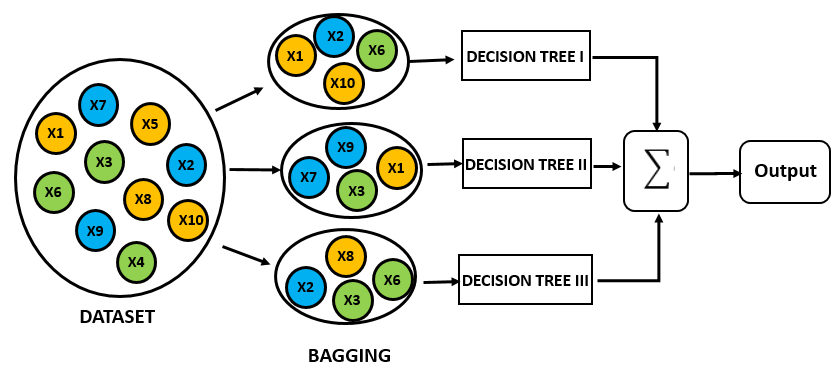

* 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보인다.
* 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤,  
  최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.
* 트리에 만들 때 사용될 속성(feature)들을 제한함으로써 각 나무들에 다양성을 준다.
  
#### 배깅(Bagging)
Bootstrap aggregating의 줄임말  
여러 개의 데이터 세트를 중첩되게 분리하는 것 (중복허용)

#### 

## RandomForestClassifier 하이퍼 파라미터 
* n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정 (default = 100) 
                 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니며, 
                 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 한다.

* max_features : 결정 트리에 사용된 max_features 파라미터와 같다. 
                 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto' 즉, 'sqrt'와 같다
                 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할때 전체 피처가 아니라 임의로 sqrt(전체 피처 개수)만큼 참조한다.

* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있다.

In [3]:
import pandas as pd 

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0],  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1) # 총 54번 학습 수행 
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [5]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


In [6]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]

angle(X,gravityMean)               0.035312
tGravityAcc-mean()-Y               0.033729
tGravityAcc-min()-X                0.030276
angle(Y,gravityMean)               0.029013
tGravityAcc-max()-X                0.027538
tGravityAcc-mean()-X               0.024708
tGravityAcc-energy()-X             0.024389
tGravityAcc-min()-Y                0.023339
tGravityAcc-max()-Y                0.021011
fBodyAccJerk-bandsEnergy()-1,8     0.018636
tGravityAcc-energy()-Y             0.015461
tBodyAcc-max()-X                   0.013750
tBodyAccJerk-entropy()-X           0.013433
tGravityAcc-arCoeff()-Z,1          0.013150
tGravityAcc-max()-Z                0.013125
fBodyAccMag-energy()               0.012262
tGravityAcc-energy()-Z             0.010683
fBodyAccJerk-bandsEnergy()-1,16    0.010095
fBodyAcc-mad()-X                   0.010036
angle(Z,gravityMean)               0.009483
dtype: float64

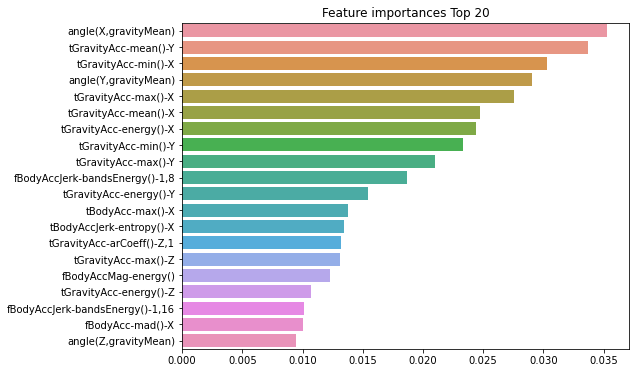

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Boosting

여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터나 학습 트리에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

부스팅 대표적인 알고리즘
- AdaBoost 
- GBM(Gradient Boosting Machine)
- XGBoost
- LightGBM
- CatBoost

## AdaBoost

AdaBoost(Adaptive Boost)는 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.  
속도나 성능적인 측면에서 Decision Tree를 약한 학습기로 사용하고 있다.

#### AdaBoost의 학습
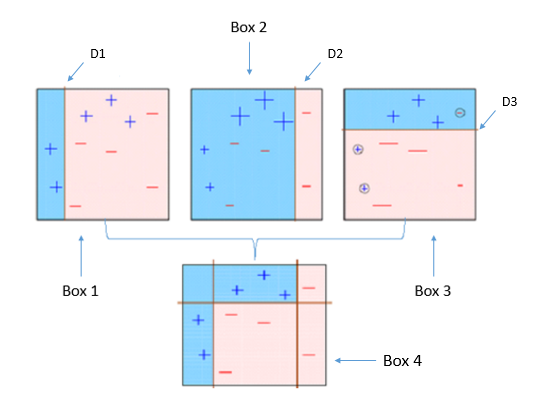

(1) 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 +와 -를 분류 

(2) 잘못 분류된 데이터에 대해 가중치를 부여(두번째 그림에서 커진 + 표시)

(3) 두번째 약한 학습기가 두번째 분류기준(D2)으로 +와 -를 다시 분류 

(4) 잘못 분류된 데이터에 대해 가중치를 부여(세번째 그림에서 커진 -를 표시)

(5) 세 번째 약한 학습기가 세번째 분류기준(D3)으로 +와 -를 다시 분류해서 오류 데이터를 찾음 

(6) 마지막으로 분류기들을 결합하여 최종 예측 수행(네번째 그림) 

## GBM(Gradient Boost Machine)

AdaBoost와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 차이점.

#### 경사 하강법(Gradient Descent)?
분류의 실제값을 y, 피처를 x1, x2, x3,..., 이 피처들에 기반한 예측함수를 F(x)라고 하면, 오류식은 h(x) = y - F(x)이다.  
이 오류식을 최소화하는 방향을 가지고 가중치 값을 업데이트 하는 방법이다. 

### GradientBoostingClassifier 하이퍼 파라미터 
* loss : 경사 하강법에서 사용할 비용 함수를 지정 (default = 'deviance')
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률(Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수)
       0~1 사이의 값을 지정할 수 있으며, 기본값은 0.1
       
       - 너무 작은 값을 적용 --> 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높다.  
       하지만 수행 시간이 오래 걸리고, 너무 작게 설정하면 모든 Weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있다.
                  
       - 너무 큰 값을 적용 --> 최소 오류 값을 찾지 못하고, 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다.
       
* n_estimators : weak learner의 개수(default = 100)
                 weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있지만, 
                 수행 시간이 오래 걸림
                  
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율 (default = 1, 전체 학습 데이터를 기반으로 학습)
              0.5이면 학습 데이터의 50% 사용 
              과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time 
import warnings 
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함, 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))


GBM 정확도: 0.9393
GBM 수행 시간: 874.9 초


In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


In [8]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393
